# Tarea 1 | Aprendizaje Estadístico y Computación | Magíster en Ciencias de Datos

---
### Caso 1: Regresión lineal con dataset 'Ozone'

In [47]:
! pip3 install faraway


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


### Cargamos el dataset

In [319]:
from faraway.datasets import ozone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import seaborn as sns

In [279]:
ozone_df = ozone.load()
ozone_df

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,33
1,5,5700,3,37,45,590,-24,128,100,34
2,5,5760,3,51,54,1450,25,139,60,35
3,6,5720,4,69,35,1568,15,121,60,36
4,4,5790,6,19,45,2631,-33,123,100,37
...,...,...,...,...,...,...,...,...,...,...
325,8,5630,4,50,50,2851,-5,100,70,384
326,2,5730,3,53,51,111,-14,225,200,387
327,3,5690,3,23,51,5000,-36,107,70,388
328,5,5650,3,61,50,3704,18,83,40,389


In [280]:
# Separamos las variables predictoras y el target
cols_predictors = ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy']
target = 'O3'

# Separamos en el dataframe X e y
X_ozone = ozone_df[cols_predictors]
y_ozone = ozone_df[target]

In [281]:
X_ozone.head()

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,5710,4,28,40,2693,-25,87,250,33
1,5700,3,37,45,590,-24,128,100,34
2,5760,3,51,54,1450,25,139,60,35
3,5720,4,69,35,1568,15,121,60,36
4,5790,6,19,45,2631,-33,123,100,37


In [282]:
y_ozone.head()

0    3
1    5
2    5
3    6
4    4
Name: O3, dtype: int64

### 1. Obtenemos nuestro dataset de entrenamiento y de test en proporción 80:20

In [283]:
# Seteamos la proporción 80:20 y un random_state para obtener siempre los mismos resultados
X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone = train_test_split(X_ozone, y_ozone, test_size=0.2, random_state=1)
df_train_ozone = pd.concat([X_train_ozone, y_train_ozone], axis=1)

In [284]:
X_train_ozone = X_train_ozone.reset_index().drop('index', axis=1)
X_test_ozone = X_test_ozone.reset_index().drop('index', axis=1)
y_train_ozone = y_train_ozone.reset_index().drop('index', axis=1)
y_test_ozone = y_test_ozone.reset_index().drop('index', axis=1)

### 2. Análisis descriptivo de las variables de entrenamiento

Tenemos que todas nuestras variables son numéricas. Procedemos a mirar estadísticos relevantes por medio de un boxplot

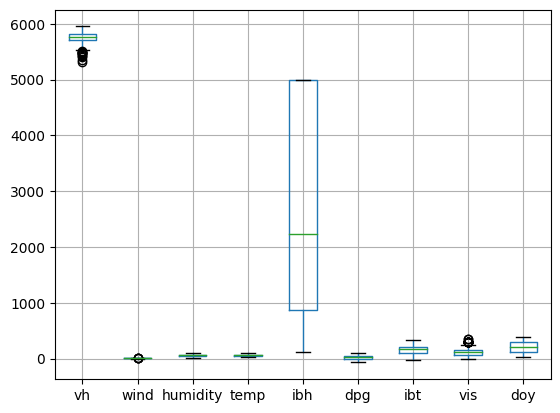

In [285]:
X_train_ozone.boxplot()
plt.show()

Dado que las variables tienen rangos de muy diferentes entre sí, procedemos a normalizarlas para poder analizar su distribución de una forma visualmente más simple.

In [286]:
scaler_ozone = StandardScaler()
X_train_ozone_scaled = pd.DataFrame(scaler_ozone.fit_transform(X_train_ozone), columns=X_train_ozone.columns)

#### Boxplots con variables normalizadas

In [287]:
X_train_ozone

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,5890,4,71,84,836,28,275,80,235
1,5780,5,76,63,875,-15,205,0,354
2,5860,4,33,81,629,-11,302,140,203
3,5900,6,86,87,990,22,295,40,216
4,5770,5,64,65,770,26,242,120,202
...,...,...,...,...,...,...,...,...,...
259,5780,7,65,59,3930,68,151,150,254
260,5850,3,73,78,377,-3,260,200,310
261,5680,4,57,35,721,28,130,140,109
262,5830,5,71,71,2716,26,176,140,288


In [288]:
X_train_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768
...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641


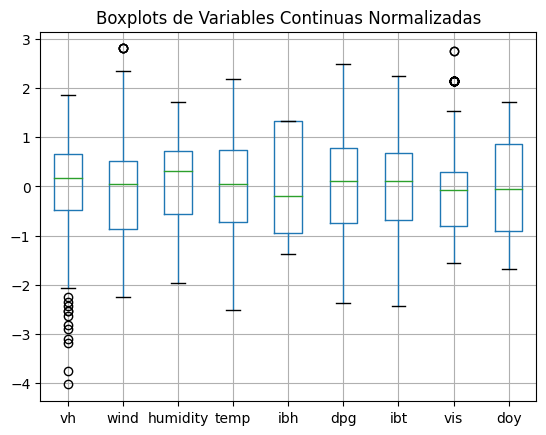

In [289]:
X_train_ozone_scaled.boxplot()
plt.title('Boxplots de Variables Continuas Normalizadas')
plt.show()

#### Describimos numéricamente las variables

In [290]:
df_train_ozone.describe()

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,O3
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,5751.401515,4.886364,57.935606,61.382576,2593.587121,16.731061,160.905303,126.030303,208.250000,11.617424
std,107.398930,2.184103,19.826041,14.510565,1808.794902,36.396836,76.647002,81.423499,104.769446,8.010535
min,5320.000000,0.000000,19.000000,25.000000,111.000000,-69.000000,-25.000000,0.000000,33.000000,1.000000
25%,5700.000000,3.000000,46.750000,51.000000,873.500000,-10.000000,108.750000,60.000000,114.500000,5.000000
50%,5770.000000,5.000000,64.000000,62.000000,2230.500000,21.000000,169.500000,120.000000,202.500000,10.000000
75%,5822.500000,6.000000,72.250000,72.000000,5000.000000,45.000000,213.000000,150.000000,298.500000,16.250000
max,5950.000000,11.000000,92.000000,93.000000,5000.000000,107.000000,332.000000,350.000000,387.000000,38.000000


Podemos ver que la variable *ibh* tiene un rango intercuartil mayor que las demás, sin embargo, si vemos sus valores máximos y mínimos, estos están mucho más cercanos a la media de los datos. También podemos decir que la distribución de estos datos se puede ver como una curva más delgada y condensada que otros.

Obtenemos las correlaciones de cada predictor con el target, ordenadamente.

In [291]:
df_train_ozone.corr().sort_values(target, ascending=False)[target]

O3          1.000000
temp        0.768541
ibt         0.749822
vh          0.598553
humidity    0.441895
dpg         0.180019
doy         0.072281
wind       -0.028573
vis        -0.447870
ibh        -0.586710
Name: O3, dtype: float64

#### Variables más correlacionadas (más cercanas a 1 en valor absoluto):

1. **temp**
2. **ibt**
3. **vh**
4. **ibh**
5. **vis**
6. **humidity**
7. **dpg**
8. **doy**
9. **wind**

##### Scatter plot de predictores vs target

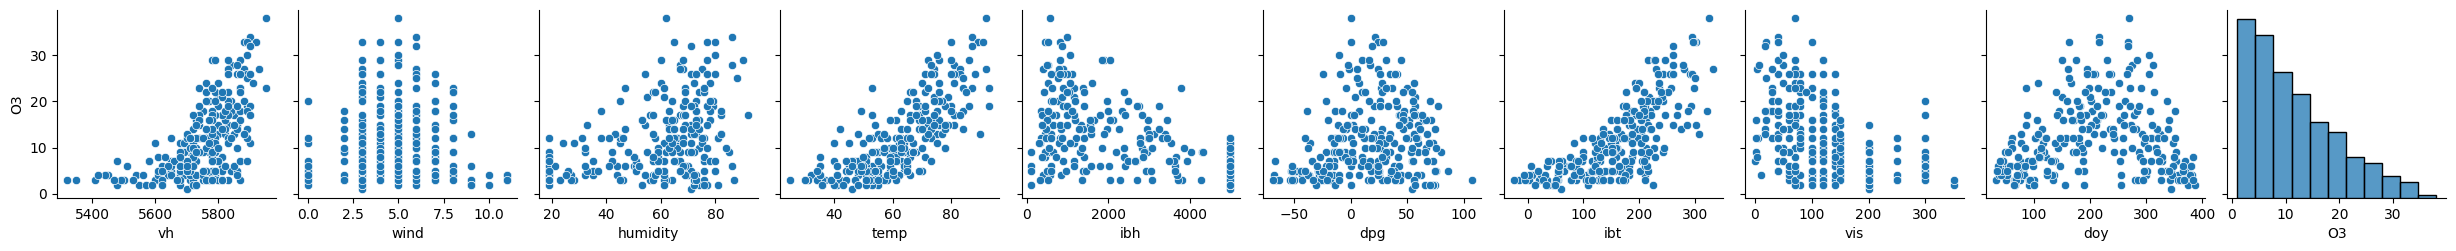

In [292]:
sns.pairplot(data=df_train_ozone, y_vars='O3')
plt.show()

Graficamos la dispersión de las variables con respecto al target. Se puede reflejar claramente en el gráfico que la variable *temp* e *ibt* tienen correlacion con *O3* mayores. La curva se puede ver más similar a un polinomio de grado 2. Similar es el caso de la variable *vh*.

Con respecto a la variable *doy* y *wind*, no se logra identificar una tendencia lineal clara.

### 3. Determinar modelo lineal con mejor desempeño

Una vez analizamos descriptivamente las variables, valdría la pena probar diferentes combinaciones lineales de estas, generando diferentes regresiones y evaluar el modelo con mejores métricas de desempeño. Para lo anterior, podemos utilizar el método *backward elimination*, en el cual, mediante el test F, vamos descartando variables según su valor p más alto.

#### Generamos variables cuadráticas de las variables

In [293]:
# Funcion que genera polinomios de la variable
def dataset_to_polinomial_n(df, columns_to_scale, n):
    for pred in columns_to_scale:
        df[f'{pred}^{n}'] = df[pred] ** n
    return df

In [294]:
# Dataset de entrenamiento original
columns_to_scale = X_train_ozone_scaled.columns.tolist()
X_train_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768
...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641


In [295]:
X_train_ozone_scaled_v2 = dataset_to_polinomial_n(X_train_ozone_scaled.copy(), columns_to_scale, 2)
X_train_ozone_scaled_v2

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,vh^2,wind^2,humidity^2,temp^2,ibh^2,dpg^2,ibt^2,vis^2,doy^2
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807,1.671727,0.165320,0.435868,2.438742,0.947771,0.096225,2.224276,0.320801,0.065437
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792,0.071176,0.002717,0.833341,0.012472,0.906176,0.762939,0.332224,2.404909,1.942656
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205,1.026351,0.165320,1.587874,1.834693,1.184165,0.582712,3.401568,0.029548,0.002521
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112,1.921662,0.260969,2.011349,3.128603,0.788959,0.021036,3.072423,1.120602,0.005493
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768,0.030103,0.002717,0.093918,0.062385,1.020287,0.065100,1.123680,0.005506,0.003572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502,0.071176,0.940075,0.127446,0.027063,0.547962,1.991726,0.016765,0.086991,0.191408
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025,0.846036,0.748777,0.579535,1.316458,1.507437,0.295000,1.677871,0.828431,0.946777
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117,0.443673,0.165320,0.002235,3.318287,1.075855,0.096225,0.163201,0.029548,0.900824
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641,0.537621,0.002717,0.435868,0.440958,0.004598,0.065100,0.038932,0.029548,0.581621


#### Variables cúbicas

In [296]:
X_train_ozone_scaled_v3 = dataset_to_polinomial_n(X_train_ozone_scaled_v2.copy(), columns_to_scale, 3)
X_train_ozone_scaled_v3

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,vh^2,...,doy^2,vh^3,wind^3,humidity^3,temp^3,ibh^3,dpg^3,ibt^3,vis^3,doy^3
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807,1.671727,...,0.065437,2.161463,-0.067218,0.287761,3.808454,-0.922688,0.029849,3.317288,-0.181700,0.016739
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792,0.071176,...,1.942656,0.018989,0.000142,0.760737,0.001393,-0.862619,-0.666400,0.191490,-3.729477,2.707659
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205,1.026351,...,0.002521,1.039785,-0.067218,-2.000894,2.485108,-1.288600,-0.444816,6.273629,0.005079,-0.000127
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112,1.921662,...,0.005493,2.663885,0.133316,2.852537,5.533828,-0.700780,0.003051,5.385445,-1.186253,0.000407
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768,0.030103,...,0.003572,0.005223,0.000142,0.028782,0.015582,-1.030585,0.016610,1.191144,-0.000409,-0.000214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.266789,0.969574,0.356996,-0.164508,0.740245,1.411285,-0.129478,0.294942,0.437502,0.071176,...,0.191408,0.018989,0.911472,0.045498,-0.004452,0.405626,2.810893,-0.002171,0.025657,0.083742
260,0.919802,-0.865319,0.761272,1.147370,-1.227777,-0.543139,1.295327,0.910182,0.973025,0.846036,...,0.946777,0.778185,-0.647931,0.441184,1.510464,-1.850797,-0.160226,2.173392,0.754023,0.921237
261,-0.666088,-0.406596,-0.047280,-1.821617,-1.037234,0.310201,-0.403982,0.171894,-0.949117,0.443673,...,0.900824,-0.295525,-0.067218,-0.000106,-6.044646,-1.115913,0.029849,-0.065930,0.005079,-0.854988
262,0.733227,0.052128,0.660203,0.664047,0.067805,0.255147,0.197312,0.171894,0.762641,0.537621,...,0.581621,0.394198,0.000142,0.287761,0.292817,0.000312,0.016610,0.007682,0.005079,0.443568


Nos quedamos con un total de 27 features

In [297]:
columns_X_train = X_train_ozone_scaled_v3.columns.tolist()
columns_X_train

['vh',
 'wind',
 'humidity',
 'temp',
 'ibh',
 'dpg',
 'ibt',
 'vis',
 'doy',
 'vh^2',
 'wind^2',
 'humidity^2',
 'temp^2',
 'ibh^2',
 'dpg^2',
 'ibt^2',
 'vis^2',
 'doy^2',
 'vh^3',
 'wind^3',
 'humidity^3',
 'temp^3',
 'ibh^3',
 'dpg^3',
 'ibt^3',
 'vis^3',
 'doy^3']

#### Utilizamos backward elimination para considerar las variables más relevantes

##### Scikit learn implementation

In [298]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

# Create the RFE object and specify the number of
selector = RFE(estimator, n_features_to_select=21)

# Fit the RFE object to the data
selector = selector.fit(X_train_ozone_scaled_v3, y_train_ozone)

# Print the selected features
selected_vars_ozone_v1 = list(X_train_ozone_scaled_v3.columns[selector.support_])

**Columnas a seleccionar según algoritmo scikit learn**

In [299]:
selected_vars_ozone_v1

['vh',
 'wind',
 'humidity',
 'temp',
 'ibh',
 'dpg',
 'ibt',
 'vis',
 'doy',
 'humidity^2',
 'temp^2',
 'ibh^2',
 'dpg^2',
 'ibt^2',
 'doy^2',
 'humidity^3',
 'temp^3',
 'ibh^3',
 'ibt^3',
 'vis^3',
 'doy^3']

##### Implementación profesor

In [300]:
def backwards_elimination(X_train, y_train, columns_decoder):
    col_indexes_to_remove = list()

    num_vars = X_train.shape[1]
    for i in range(num_vars, 0, -1):
        # Fit model with i variables
        model = LinearRegression()
        model.fit(X_train[:, :i], y_train)

        # Check p-values of the model
        p_values = f_regression(X_train, y_train)[1]
        max_p_value = np.max(p_values)

        # If the maximum p-value is greater than the threshold, remove the variable
        # with the highest p-value
        if max_p_value > 0.05:
            var_to_remove = np.argmax(p_values)
            col_indexes_to_remove.append(var_to_remove)
            X_train = np.delete(X_train, var_to_remove, 1)
    

    return [columns_decoder[i] for i in col_indexes_to_remove]

In [301]:
X_train_ozone_scaled_v3.head()

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,vh^2,...,doy^2,vh^3,wind^3,humidity^3,temp^3,ibh^3,dpg^3,ibt^3,vis^3,doy^3
0,1.292953,-0.406596,0.660203,1.561647,-0.973535,0.310201,1.491401,-0.566393,0.255807,1.671727,...,0.065437,2.161463,-0.067218,0.287761,3.808454,-0.922688,0.029849,3.317288,-0.181700,0.016739
1,0.266789,0.052128,0.912875,0.111677,-0.951933,-0.873464,0.576388,-1.550777,1.393792,0.071176,...,1.942656,0.018989,0.000142,0.760737,0.001393,-0.862619,-0.666400,0.191490,-3.729477,2.707659
2,1.013090,-0.406596,-1.260109,1.354509,-1.088193,-0.763356,1.844334,0.171894,-0.050205,1.026351,...,0.002521,1.039785,-0.067218,-2.000894,2.485108,-1.288600,-0.444816,6.273629,0.005079,-0.000127
3,1.386240,0.510851,1.418221,1.768786,-0.888234,0.145039,1.752833,-1.058585,0.074112,1.921662,...,0.005493,2.663885,0.133316,2.852537,5.533828,-0.700780,0.003051,5.385445,-1.186253,0.000407
4,0.173501,0.052128,0.306461,0.249769,-1.010093,0.255147,1.060038,-0.074202,-0.059768,0.030103,...,0.003572,0.005223,0.000142,0.028782,0.015582,-1.030585,0.016610,1.191144,-0.000409,-0.000214


In [302]:
column_decoder = dict(zip(range(len(columns_X_train)), columns_X_train))
columns_to_delete = backwards_elimination(X_train_ozone_scaled_v3.values, y_train_ozone.values, column_decoder)
selected_vars_ozone_v2 = list(set(columns_X_train) - set(columns_to_delete))

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

**Columnas a seleccionar según algoritmo clases**

In [303]:
selected_vars_ozone_v2

['vis^2',
 'wind^2',
 'vh',
 'humidity^2',
 'ibh',
 'doy^2',
 'humidity^3',
 'humidity',
 'temp^3',
 'vis^3',
 'vh^2',
 'temp^2',
 'doy',
 'ibh^3',
 'wind^3',
 'ibt^3',
 'temp',
 'ibt',
 'dpg^2',
 'dpg',
 'dpg^3',
 'ibt^2']

#### Generamos combinaciones de variables y evaluamos diferentes modelos

In [304]:
columns_third_degree = set([col for col in selected_vars_ozone_v1 + selected_vars_ozone_v1 if '^3' in col])
columns_second_degree = set([col for col in selected_vars_ozone_v1 + selected_vars_ozone_v1 if '^2' in col])
columns_first_degree = set([col for col in selected_vars_ozone_v1 + selected_vars_ozone_v1 if col not in columns_second_degree | columns_third_degree])

In [306]:
var_combinations = {
    'linear': list(columns_first_degree),
    'quadratic': list(columns_second_degree),
    'cubic': list(columns_third_degree),
    'all_selected': list(columns_first_degree | columns_second_degree | columns_third_degree),
    'selected_v1': selected_vars_ozone_v1,
    'selected_v2': selected_vars_ozone_v2,
    'linear_quadratic': list(columns_first_degree | columns_second_degree),
    'linear_cubic': list(columns_first_degree | columns_third_degree),
    'quadratic_cubic': list(columns_second_degree | columns_third_degree),
    'all': columns_X_train
}
var_combinations

{'linear': ['wind',
  'vh',
  'temp',
  'ibt',
  'ibh',
  'dpg',
  'humidity',
  'vis',
  'doy'],
 'quadratic': ['ibh^2', 'humidity^2', 'dpg^2', 'doy^2', 'ibt^2', 'temp^2'],
 'cubic': ['ibh^3', 'ibt^3', 'humidity^3', 'temp^3', 'doy^3', 'vis^3'],
 'all_selected': ['wind',
  'ibh^2',
  'vh',
  'humidity^2',
  'ibh',
  'doy^2',
  'humidity^3',
  'humidity',
  'temp^3',
  'vis^3',
  'temp^2',
  'doy',
  'ibh^3',
  'ibt^3',
  'temp',
  'ibt',
  'dpg^2',
  'dpg',
  'ibt^2',
  'doy^3',
  'vis'],
 'selected_v1': ['vh',
  'wind',
  'humidity',
  'temp',
  'ibh',
  'dpg',
  'ibt',
  'vis',
  'doy',
  'humidity^2',
  'temp^2',
  'ibh^2',
  'dpg^2',
  'ibt^2',
  'doy^2',
  'humidity^3',
  'temp^3',
  'ibh^3',
  'ibt^3',
  'vis^3',
  'doy^3'],
 'selected_v2': ['vis^2',
  'wind^2',
  'vh',
  'humidity^2',
  'ibh',
  'doy^2',
  'humidity^3',
  'humidity',
  'temp^3',
  'vis^3',
  'vh^2',
  'temp^2',
  'doy',
  'ibh^3',
  'wind^3',
  'ibt^3',
  'temp',
  'ibt',
  'dpg^2',
  'dpg',
  'dpg^3',
  'ibt^2'

##### Definimos una función para crear la regresión

In [350]:
def fitted_linear_reg(x, y):
    X = sm.add_constant(x)
    regr = sm.OLS(y, X)
    results = regr.fit()
    return results

def train_regressions(X_train, y_train, vars):
    models = dict()
    for name, columns in vars.items():
        print(y_train)
        linreg_fitted = fitted_linear_reg(X_train[columns], y_train)
        models[name] = linreg_fitted

    return models


    

##### Entrenamos nuestros modelos

In [351]:
models = train_regressions(X_train_ozone_scaled_v3, y_train_ozone, var_combinations)
models

     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34
4    20
..   ..
259   7
260  15
261   8
262  19
263   6

[264 rows x 1 columns]
     O3
0    14
1     7
2    15
3    34


{'linear': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a9656f90>,
 'quadratic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a95b3810>,
 'cubic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a97c8450>,
 'all_selected': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a95e5c50>,
 'selected_v1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a97caa90>,
 'selected_v2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a9655dd0>,
 'linear_quadratic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a951fd10>,
 'linear_cubic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a951d5d0>,
 'quadratic_cubic': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a968bcd0>,
 'all': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a968a610>}

##### Evaluamos cada modelo por su R^2, RMSE y test F (valor p)

In [393]:
def get_metrics_from_model(model, X_train, y_train):
    metrics = dict()
    metrics['R2'] = model.rsquared
    metrics['F_pvalue'] = model.f_pvalue
    y_pred = model.predict(sm.add_constant(X_train))
    metrics['RMSE'] = eval_measures.rmse(y_train.squeeze(), y_pred)
    return metrics

In [396]:
model_metrics = list()
for model_name, obj in models.items():
    X_model = X_train_ozone_scaled_v3[var_combinations[model_name]]
    metrics = get_metrics_from_model(obj, X_model, y_train_ozone)
    metrics['Model'] = f'Model {model_name}'
    model_metrics.append(metrics)

##### Generamos un dataframe con las métricas del modelo

In [397]:
models_metrics_df = pd.DataFrame(model_metrics)
models_metrics_df

,R2,F_pvalue,RMSE,Model
0,0.692949,4.445012e-60,4.430401,Model linear
1,0.444302,2.769664e-30,5.960148,Model quadratic
2,0.543812,4.011897e-41,5.400193,Model cubic
3,0.805889,7.557885e-74,3.522597,Model all_selected
4,0.805889,7.557885e-74,3.522597,Model selected_v1
5,0.776335,9.557036e-66,3.781261,Model selected_v2
6,0.782893,3.032299e-73,3.725410,Model linear_quadratic
7,0.732115,4.097392e-62,4.138198,Model linear_cubic
8,0.688256,1.359502e-56,4.464124,Model quadratic_cubic
9,0.808366,1.421829e-69,3.500044,Model all


Vemos que todos los modelos tienen un valor p muy bajo, por lo que se prefiere cualquiera de estos al modelo base, con significancia estadística. Ordenamos por R^2 y RMSE para elegir el mejor modelo.

In [398]:
models_metrics_df.sort_values('R2', ascending=False)

,R2,F_pvalue,RMSE,Model
9,0.808366,1.421829e-69,3.500044,Model all
3,0.805889,7.557885e-74,3.522597,Model all_selected
4,0.805889,7.557885e-74,3.522597,Model selected_v1
6,0.782893,3.032299e-73,3.725410,Model linear_quadratic
5,0.776335,9.557036e-66,3.781261,Model selected_v2
7,0.732115,4.097392e-62,4.138198,Model linear_cubic
0,0.692949,4.445012e-60,4.430401,Model linear
8,0.688256,1.359502e-56,4.464124,Model quadratic_cubic
2,0.543812,4.011897e-41,5.400193,Model cubic
1,0.444302,2.769664e-30,5.960148,Model quadratic


Tenemos que el mejor modelo es el que utiliza todas las variables, `Model all`, aunque por parsimonia y por mejor interpretabilidad, preferimos utilizar el modelo `Model selected_v1`, dado que tienen un R2 y RMSE similar al mejor modelo, y menos variables.

In [403]:
selected_model = 'selected_v1'

In [406]:
print(models[selected_model].summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     47.84
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           7.56e-74
Time:                        22:21:40   Log-Likelihood:                -707.03
No. Observations:                 264   AIC:                             1458.
Df Residuals:                     242   BIC:                             1537.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7720      0.806     18.336      0.0

### 4. Significancia del modelo seleccionado

#### a. ¿Es el modelo significativo?

El modelo sí es significativo. Su valor p, dado el test de Fisher es de 7.56e-74, el cual es un valor muy bajo y menor a 0.05. Con lo anterior, podemos agregar entonces que se rechaza la hipótesis de mantener el modelo nulo, en contraposición con el modelo propuesto.

#### b. ¿Existe alguna covariable no significativa? 

Sí existen. En particular, las variables `ibh`, `ibt`, `humidity^2`, `ibh^2`, `ibt^2`, `humidity^3`, `temp^3`, `ibh^3` y `ibt^3`  tienen un valor p por sobre el umbral de 0.05.

#### c. ¿En caso de existir alguna covariable no significativa, la quitaría del modelo? Fundamente.

Se puede probar quitando las variables, ajustando una nueva regresión y observar los estadísticos. Lo hacemos a continuación.

In [407]:
var_combinations[selected_model]

['vh',
 'wind',
 'humidity',
 'temp',
 'ibh',
 'dpg',
 'ibt',
 'vis',
 'doy',
 'humidity^2',
 'temp^2',
 'ibh^2',
 'dpg^2',
 'ibt^2',
 'doy^2',
 'humidity^3',
 'temp^3',
 'ibh^3',
 'ibt^3',
 'vis^3',
 'doy^3']

In [408]:
new_model_vars = list(set(var_combinations[selected_model]) - set(['ibh', 'ibt', 'humidity^2', 'ibh^2', 'ibt^2', 'humidity^3', 'temp^3', 'ibh^3', 'ibt^3']))
new_model_vars

['wind',
 'vh',
 'temp',
 'dpg^2',
 'dpg',
 'doy^2',
 'doy',
 'humidity',
 'doy^3',
 'vis^3',
 'vis',
 'temp^2']

In [410]:
var_combinations['new_model'] = new_model_vars

#### Ejecutamos la regresión y miramos los estadísticos del nuevo modelo

In [411]:
linreg_fitted_new_model = fitted_linear_reg(X_train_ozone_scaled_v3[new_model_vars], y_train_ozone)
models['new_model'] = linreg_fitted_new_model

In [414]:
print(linreg_fitted_new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     79.65
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.39e-78
Time:                        22:40:14   Log-Likelihood:                -716.15
No. Observations:                 264   AIC:                             1458.
Df Residuals:                     251   BIC:                             1505.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4802      0.665     21.790      0.0

Vemos que el valor de R2 es cercano al valor obtenido en el modelo anterior, sin embargo ahora con menos variables, lo que es un mejor indicador. Asimismo, cada variable de este nuevo modelo es significativa estadísticamente (valor p menor a 0.05). En conclusión, las covariables seleccionadas pueden ser una buena alternativa a ser eliminadas del modelo seleccionado original.

### 5. Significancia del modelo seleccionado

Predecimos la variable `O2` con los datos de test. Para lo anterior, primero debemos estandarizar los datos de entrenamiento, dado que nuestro modelo fue entrenado con datos estandarizados.

In [419]:
X_test_ozone_scaled = pd.DataFrame(scaler_ozone.transform(X_test_ozone), columns=X_test_ozone.columns.tolist())
X_test_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,-1.412389,-0.865319,-1.866523,-1.131155,1.332923,-0.515612,-1.593498,0.171894,-1.073435
1,-0.572800,0.510851,0.811806,-0.371646,1.332923,-0.102705,-0.874560,-0.566393,1.087779
2,0.733227,-0.865319,0.255927,1.216416,-0.148218,1.301177,0.746319,-0.689441,0.131490
3,1.199665,-0.406596,1.013944,1.561647,-0.979074,0.282674,1.334542,-0.566393,0.265370
4,-0.852663,-0.865319,-0.198884,-0.785924,1.332923,0.282674,-1.188278,2.140661,1.288600
...,...,...,...,...,...,...,...,...,...
61,-0.945951,-0.865319,0.154858,-0.785924,0.615063,0.034930,-1.018347,-1.058585,1.728493
62,-0.386225,0.510851,0.356996,-0.371646,1.332923,0.502891,-0.952989,0.910182,0.896522
63,-0.572800,1.887021,0.205392,0.042631,0.623925,1.576448,-0.730772,-0.074202,-0.327529
64,-1.132526,-0.406596,-0.704229,-1.545432,-0.715416,0.640526,-0.600056,0.294942,-0.863051


##### Generamos las columnas extras necesarias en el dataframe de test

In [421]:
X_test_ozone_scaled['humidity^2'] = X_test_ozone_scaled['humidity'] ** 2
X_test_ozone_scaled['temp^2'] = X_test_ozone_scaled['temp'] ** 2
X_test_ozone_scaled['ibh^2'] = X_test_ozone_scaled['ibh'] ** 2
X_test_ozone_scaled['dpg^2'] = X_test_ozone_scaled['dpg'] ** 2
X_test_ozone_scaled['ibt^2'] = X_test_ozone_scaled['ibt'] ** 2
X_test_ozone_scaled['doy^2'] = X_test_ozone_scaled['doy'] ** 2
X_test_ozone_scaled['humidity^3'] = X_test_ozone_scaled['humidity'] ** 3
X_test_ozone_scaled['temp^3'] = X_test_ozone_scaled['temp'] ** 3
X_test_ozone_scaled['ibh^3'] = X_test_ozone_scaled['ibh'] ** 3
X_test_ozone_scaled['ibt^3'] = X_test_ozone_scaled['ibt'] ** 3
X_test_ozone_scaled['vis^3'] = X_test_ozone_scaled['vis'] ** 3
X_test_ozone_scaled['doy^3'] = X_test_ozone_scaled['doy'] ** 3
X_test_ozone_scaled

,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,humidity^2,...,ibh^2,dpg^2,ibt^2,doy^2,humidity^3,temp^3,ibh^3,ibt^3,vis^3,doy^3
0,-1.412389,-0.865319,-1.866523,-1.131155,1.332923,-0.515612,-1.593498,0.171894,-1.073435,3.483908,...,1.776682,0.265856,2.539236,1.152263,-6.502794,-1.447324,2.368180,-4.046267,0.005079,-1.236879
1,-0.572800,0.510851,0.811806,-0.371646,1.332923,-0.102705,-0.874560,-0.566393,1.087779,0.659030,...,1.776682,0.010548,0.764855,1.183264,0.535004,-0.051332,2.368180,-0.668911,-0.181700,1.287130
2,0.733227,-0.865319,0.255927,1.216416,-0.148218,1.301177,0.746319,-0.689441,0.131490,0.065498,...,0.021968,1.693061,0.556993,0.017290,0.016763,1.799892,-0.003256,0.415694,-0.327712,0.002273
3,1.199665,-0.406596,1.013944,1.561647,-0.979074,0.282674,1.334542,-0.566393,0.265370,1.028083,...,0.958586,0.079905,1.781001,0.070421,1.042419,3.808454,-0.938527,2.376820,-0.181700,0.018688
4,-0.852663,-0.865319,-0.198884,-0.785924,1.332923,0.282674,-1.188278,2.140661,1.288600,0.039555,...,1.776682,0.079905,1.412005,1.660491,-0.007867,-0.485446,2.368180,-1.677855,9.809431,2.139709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.945951,-0.865319,0.154858,-0.785924,0.615063,0.034930,-1.018347,-1.058585,1.728493,0.023981,...,0.378302,0.001220,1.037031,2.987690,0.003714,-0.485446,0.232679,-1.056058,-1.186253,5.164202
62,-0.386225,0.510851,0.356996,-0.371646,1.332923,0.502891,-0.952989,0.910182,0.896522,0.127446,...,1.776682,0.252899,0.908189,0.803751,0.045498,-0.051332,2.368180,-0.865494,0.754023,0.720580
63,-0.572800,1.887021,0.205392,0.042631,0.623925,1.576448,-0.730772,-0.074202,-0.327529,0.042186,...,0.389282,2.485188,0.534028,0.107275,0.008665,0.000077,0.242883,-0.390253,-0.000409,-0.035136
64,-1.132526,-0.406596,-0.704229,-1.545432,-0.715416,0.640526,-0.600056,0.294942,-0.863051,0.495939,...,0.511820,0.410274,0.360067,0.744858,-0.349254,-3.691046,-0.366164,-0.216060,0.025657,-0.642850


In [430]:
y_pred = models[selected_model].predict(sm.add_constant(X_test_ozone_scaled))
y_pred

0      6.112691
1      7.226823
2     18.502090
3     24.971985
4      2.327166
        ...    
61     4.872448
62     4.166610
63     5.655265
64     7.953096
65     8.755779
Length: 66, dtype: float64

##### Calculamos los intervalos de confianza de las predicciones
PD. ci = confidence interval

In [431]:
predictions = models[selected_model].get_prediction()
predictions_df = predictions.summary_frame(alpha=0.05)
predictions_df['y_predicted'] = y_pred
predictions_df['y_test'] = y_test_ozone
predictions_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,y_predicted,y_test
0,25.232294,0.607796,24.035047,26.429540,17.886660,32.577927,6.112691,6.0
1,13.235412,0.833309,11.593946,14.876877,5.804440,20.666383,7.226823,7.0
2,22.224676,1.240732,19.780665,24.668688,14.576270,29.873083,18.502090,14.0
3,28.146207,1.037190,26.103135,30.189280,20.616329,35.676086,24.971985,13.0
4,17.726441,0.943911,15.867111,19.585771,10.244327,25.208555,2.327166,5.0
...,...,...,...,...,...,...,...,...
259,5.728608,0.937887,3.881145,7.576072,-1.750566,13.207783,NaN,NaN
260,17.222936,0.999315,15.254471,19.191402,9.712957,24.732915,NaN,NaN
261,11.070833,1.467070,8.180976,13.960689,3.268513,18.873153,NaN,NaN
262,14.557869,0.691078,13.196572,15.919165,7.183721,21.932017,NaN,NaN


#### Calculamos el r2 y la suma de errores cuadráticos

In [432]:
# Error cuadrático medio
mean_squared_error(y_test_ozone, y_pred)

13.925393304543633

In [434]:
# Coeficiente de determinación
r2_score(y_test_ozone, y_pred)

0.7814821943111243

#### Graficamos el error residual y comprobamos que su distribución es similar a la de una normal

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_20288/2695359231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(models[selected_model].resid, bins=90,)


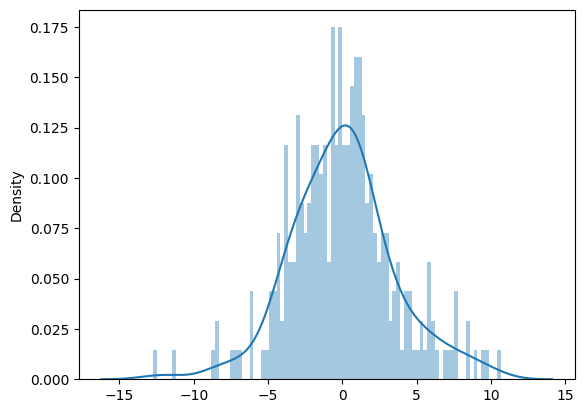

In [450]:
sns.distplot(models[selected_model].resid, bins=90,)
plt.show()